In [14]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import librosa.feature
import numpy as np

/Users/cnnrrss/Projects/pers/spotli/experiments/venv/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


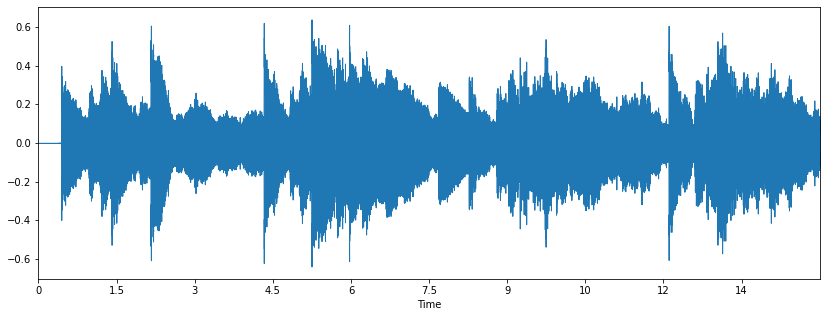

In [17]:
# Load example and display waveform
y, sr = librosa.load('./example.mp3', sr=44100, duration=15)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

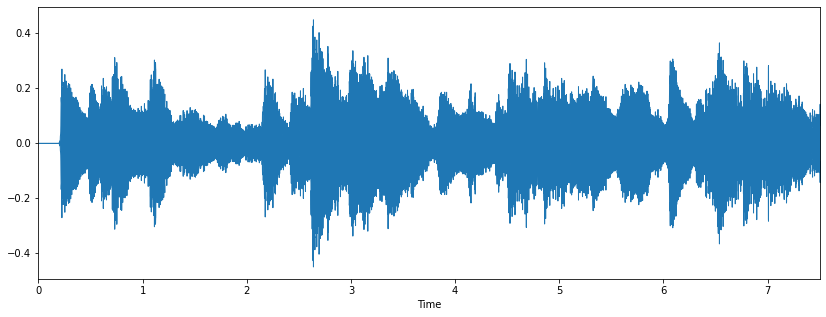

In [24]:
# you can time stretch
y_fast = librosa.effects.time_stretch(y, 2.0) # twice as fast

plt.figure(figsize=(14, 5))
librosa.display.waveplot(y_fast, sr=sr)

y_slow= librosa.effects.time_stretch(y, .5) # 1/2 time

plt.figure(figsize=(14, 5))
librosa.display.waveplot(y_slow, sr=sr)

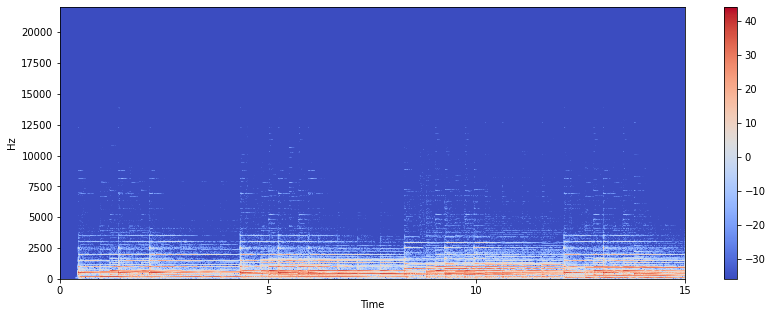

In [25]:
# display spectrogram
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [19]:
librosa.feature.chroma_stft(y, sr=sr)

array([[0.43947318, 0.47534755, 0.6867514 , ..., 0.34690553, 0.2623419 ,
        0.33011362],
       [0.32552058, 0.42569494, 0.6562554 , ..., 0.23227616, 0.17331024,
        0.20713134],
       [0.42620632, 0.49765873, 0.58193743, ..., 0.17435499, 0.13435099,
        0.15595789],
       ...,
       [0.77661425, 0.34467012, 0.45933113, ..., 0.60629165, 0.63500714,
        0.5818653 ],
       [0.9293536 , 0.41432703, 0.4479665 , ..., 1.        , 1.        ,
        1.        ],
       [0.7029201 , 0.39057863, 0.4751846 , ..., 0.49394155, 0.42583117,
        0.494998  ]], dtype=float32)

[Text(0.5, 1.0, 'Chromagram')]

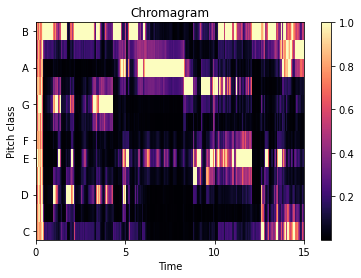

In [20]:
# Use a pre-computed power spectrogram with a larger frame

S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)


fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')